In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data = pd.read_csv('Rat_Sightings.csv')

data = data.sample(frac=0.1, random_state=200)
data = data.iloc[:, 23:26]
#data.head()

# Data treatment and Real Labels

In [3]:
#pega os dados do data set
list1=list(data['X Coordinate (State Plane)'])
list2=list(data['Y Coordinate (State Plane)'])

#transforma os dados em uma lista conjunta
X = zip(list1,list2)
dt=np.dtype('int')
listaSemNaN=[]
X=list(X)

#criamos as classes reais de acordo com os dados validos
real_labels = [];
for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        if(data.iloc[i,0] == 'BROOKLYN'):
            real_labels.append(0);
        elif(data.iloc[i,0] == 'MANHATTAN') :
            real_labels.append(2);
        elif(data.iloc[i,0] == 'BRONX') :
            real_labels.append(1);
        elif(data.iloc[i,0] == 'STATEN ISLAND') :
            real_labels.append(3);
        elif(data.iloc[i,0] == 'QUEENS') :
            real_labels.append(4);
        
print ("Real labels have size: ", len(real_labels))

#remove dessa lista valores que causam erros por não serem numeros
for i in range(0,len(X)):
    tup=X[i]
    if((X[i][0] == X[i][0]) is False or (X[i][1] == X[i][1]) is False):
        nada = 0 #print "Não é NaN"
    else:
        listaSemNaN.append(tup)
        
#Transforma em um NP.Array para realizar contas matematicas da blibioteca numpy
X = np.array(listaSemNaN,dtype=dt)

Real labels have size:  10117


#  Classification with Kmeans ans Predicted Labels

In [4]:
scores = []
pred_labels = []
start = 5
range_values = np.arange(start, 6)

for i in range_values:
    kmeans = KMeans(init= 'k-means++', n_clusters=i, n_init=10, random_state =1)
    teste = kmeans.fit_predict(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(data))
    label = kmeans.labels_
    
#     plt.figure(figsize=(10,6))
#     plt.scatter(X[:, 0], X[:, 1], c=label)
#     plt.title("Teste num de cluster "+str(i))
    
    print('\nNumber of clusters =', i)
    print('Silhouette score =', score)
    print('Labels =', label)
    
    scores.append(score)
    pred_labels.append(label)


Number of clusters = 5
Silhouette score = 0.47146657242661777
Labels = [3 3 1 ... 3 4 0]


# Ploting with labels

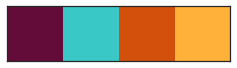

In [5]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

Map of NYC

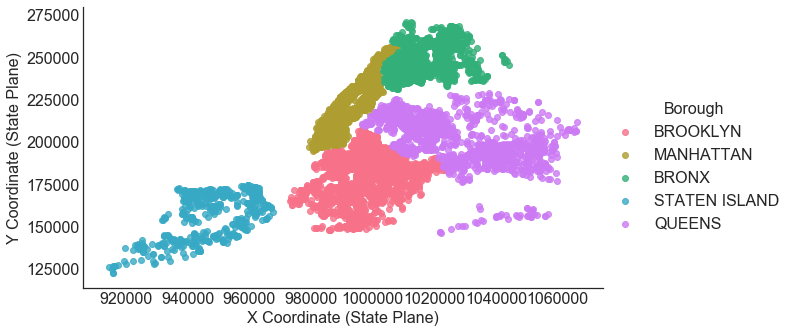

In [14]:
for i in range_values:
    dr = pd.DataFrame({"x":np.array(X[:, 0]).flatten(), 
                       "y":np.array(X[:, 1]).flatten(), 
                       "labels":np.array(real_labels).flatten()})

    #plot data with seaborn
    facet = sns.lmplot(data=data, x='X Coordinate (State Plane)', 
                       y='Y Coordinate (State Plane)', hue='Borough', size=5, aspect=1.8,
                       fit_reg=False, legend=True, legend_out=True)

Map of NYC according to our Real_labels

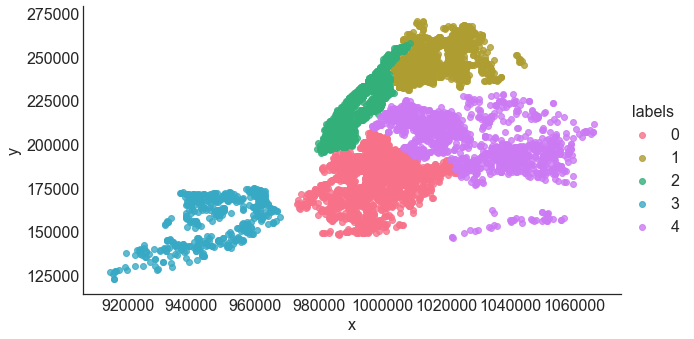

In [7]:
for i in range_values:
    dr = pd.DataFrame({"x":np.array(X[:, 0]).flatten(), 
                       "y":np.array(X[:, 1]).flatten(), 
                       "labels":np.array(real_labels).flatten()})

    #plot data with seaborn
    facet = sns.lmplot(data=dr, x='x', y='y', hue='labels', size=5, aspect=1.8,
                       fit_reg=False, legend=True, legend_out=True)

Map of NYC according to our Kmeans Predicted_labels

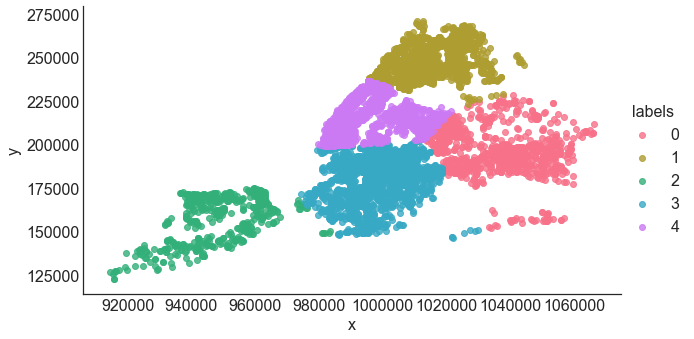

In [8]:
for i in range_values:
    dp = pd.DataFrame({"x":np.array(X[:, 0]).flatten(), 
                       "y":np.array(X[:, 1]).flatten(), 
                       "labels":np.array(pred_labels[i-start]).flatten()})

    #plot data with seaborn
    facet = sns.lmplot(data=dp, x='x', y='y', hue='labels', size=5, aspect=1.8,
                       fit_reg=False, legend=True, legend_out=True)

# Kmeans Evaluation

In [9]:
len(pred_labels[0])

10117

In [10]:
pred_labels[0]

array([3, 3, 1, ..., 3, 4, 0], dtype=int32)

In [11]:
len(real_labels)

10117

In [12]:
real_labels

[0,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 4,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 4,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 3,
 2,
 1,
 0,
 1,
 3,
 1,
 1,
 0,
 2,
 4,
 2,
 2,
 2,
 4,
 4,
 4,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 4,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 2,
 2,
 4,
 1,
 0,
 4,
 0,
 4,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 4,
 0,
 2,
 0,
 1,
 1,
 1,
 4,
 0,
 1,
 0,
 2,
 4,
 1,
 0,
 4,
 0,
 0,
 1,
 4,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 4,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 4,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 4,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 4,
 0,
 4,
 1,
 2,
 4,
 0,
 2,
 4,
 3,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 4,
 1,
 2,
 1,
 3,
 1,
 2,
 0,
 4,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 4,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 4,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,


In [13]:
metrics.adjusted_mutual_info_score(real_labels, pred_labels[0])  

0.7085980927553872